##Proyecto Individual Nro 1
+ Data 07- Giselle Pereira Nuñez

**Análisis exploratorio de los datos EDA**
- Visualizo encabezados
- Visualizo tipos de datos de las columnas
- Analizo la cantidad de datos faltantes
- Estadísticas descriptivas
- Reviso Correlaciones
- Valores atípicos (outliers o anomalias)

In [1]:
#Librerias que voy a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Abro el csv mas grande(todo unido)
todo_df= pd.read_csv ("archivo.csv")

In [3]:
#Visualizo encabezados de todo_df
todo_df.head(1)

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,userId,score,timestamp,movieId,plataform
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,543,5.0,2003-07-30,as1,amazon


Visualizo tipos de datos de las columnas

In [4]:
todo_df.dtypes

id                object
type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
listed_in         object
description       object
duration_int       int64
duration_type     object
userId             int64
score            float64
timestamp         object
movieId           object
plataform         object
dtype: object

Analizo la cantidad de datos faltantes

In [5]:
#Cantidad de datos faltantes de todo_df
todo_df.isnull().sum()
#tengo datos faltantes

id                     0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       4577546
release_year           0
rating                 0
listed_in              0
description         1815
duration_int           0
duration_type     231117
userId                 0
score                  0
timestamp              0
movieId                0
plataform              0
dtype: int64

In [6]:
#porcentaje de datos faltantes en todo_df por columna
print("Porcentaje datos faltantes del df en cada columna \n", round(todo_df.isnull().mean() * 100, 1))
#viendo asi que las columnas, country es la que mas faltantes tiene, luego sigue date_added, director y cast (estas tres ultimas sin tanta importancia para mi futuro ML)

Porcentaje datos faltantes del df en cada columna 
 id                0.0
type              0.0
title             0.0
director         35.9
cast             23.1
country          50.0
date_added       41.5
release_year      0.0
rating            0.0
listed_in         0.0
description       0.0
duration_int      0.0
duration_type     2.1
userId            0.0
score             0.0
timestamp         0.0
movieId           0.0
plataform         0.0
dtype: float64


In [7]:
#porcentaje de datos faltantes en total
print("El porcentaje de los datos faltantes en total es de:", round(todo_df.isnull().mean().mean() * 100, 1), "%")

El porcentaje de los datos faltantes en total es de: 8.5 %


In [8]:
#Relleno los espacios vacios del campo country
todo_df['country'] = todo_df['country'].fillna("no declarado")

Estadísticas descriptivas
- El conteo de valores sin los valores faltantes.
- La media Indica el valor típico de la columna, útil para tener una idea general de la distribución de los datos.
- La desviación estándar mide la variabilidad de los datos alrededor de la media. Una desviación estándar grande indica que los datos están más dispersos alrededor de la media, mientras que una desviación estándar pequeña indica que los datos están más agrupados cerca de la media.
- El valor mínimo y el valor máximo indican los límites del rango de valores observados.
- Los cuartiles dividen los datos en cuatro partes iguales. El primer cuartil indica el valor que es mayor que el 25% de los valores en la columna. El segundo cuartil indica el valor que es mayor que el 50% de los valores en la columna. El tercer cuartil indica el valor que es mayor que el 75% de los valores en la columna. 

In [9]:
todo_df.describe()

,release_year,duration_int,userId,score
count,1.102429e+07,1.102429e+07,1.102429e+07,1.102429e+07
mean,2.010819e+03,6.569939e+01,8.997251e+04,3.533455e+00
std,1.538663e+01,5.175968e+01,8.686601e+04,1.059692e+00
min,1.920000e+03,0.000000e+00,1.000000e+00,5.000000e-01
25%,2.010000e+03,3.000000e+00,2.855800e+04,3.000000e+00
50%,2.016000e+03,8.300000e+01,5.684300e+04,3.500000e+00
75%,2.019000e+03,1.010000e+02,1.168670e+05,4.000000e+00
max,2.021000e+03,6.010000e+02,2.708960e+05,5.000000e+00


Reviso Correlaciones
- Los valores de la matriz de correlación varían entre -1 y 1. Un valor de 1 indica una correlación perfecta positiva (dos variables que aumentan juntas), mientras que un valor de -1 indica una correlación perfecta negativa (dos variables que disminuyen juntas). Un valor de 0 indica que no hay correlación entre las variables.

In [10]:
todo_df.corr()

C:\Users\Jhonatan\AppData\Local\Temp\ipykernel_2244\4066477765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  todo_df.corr()


,release_year,duration_int,userId,score
release_year,1.000000,-0.134076,-0.000367,0.000517
duration_int,-0.134076,1.000000,-0.000043,-0.000325
userId,-0.000367,-0.000043,1.000000,0.004608
score,0.000517,-0.000325,0.004608,1.000000


C:\Users\Jhonatan\AppData\Local\Temp\ipykernel_2244\3348096504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(todo_df.corr(), annot=True, cmap='coolwarm')


<Axes: >

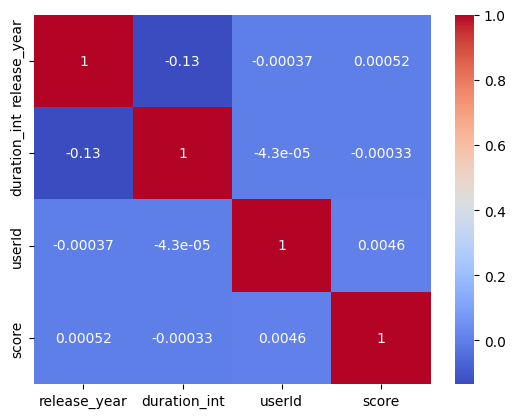

In [11]:
#correlacion con mapa de calor
sns.heatmap(todo_df.corr(), annot=True, cmap='coolwarm')
#este grafico muestra que hay poca correlacion entre todos los campos numericos

Valores atípicos (outliers o anomalias)
- Análisis gráfico
- Análisis estadístico
- Eliminación

In [12]:
#veo el tamaño
todo_df.shape

(11024289, 18)

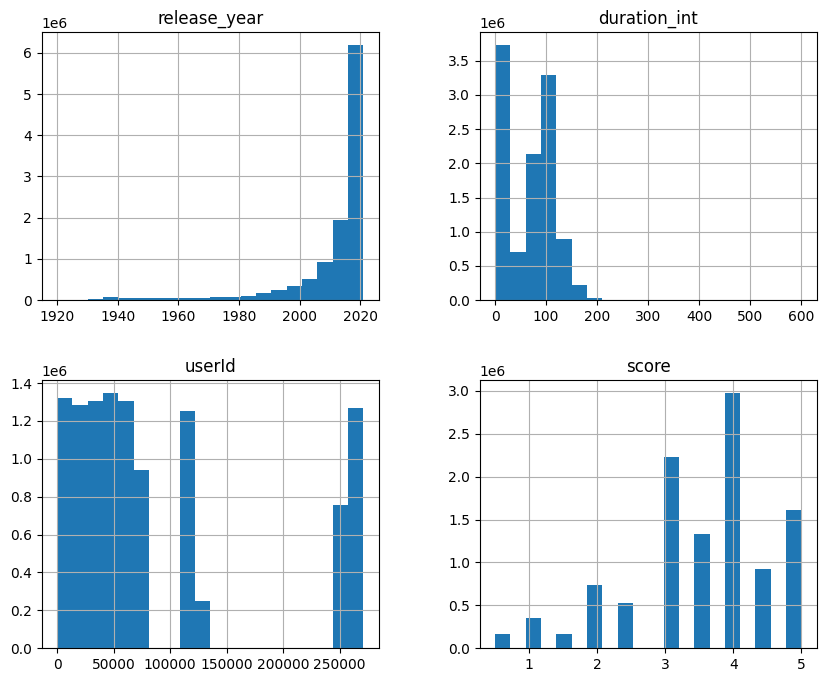

In [13]:
# visualización de distribuciones
todo_df.hist(bins=20, figsize=(10,8))
plt.show()
# se visualiza en este grafico que el campo userid predomina en el df

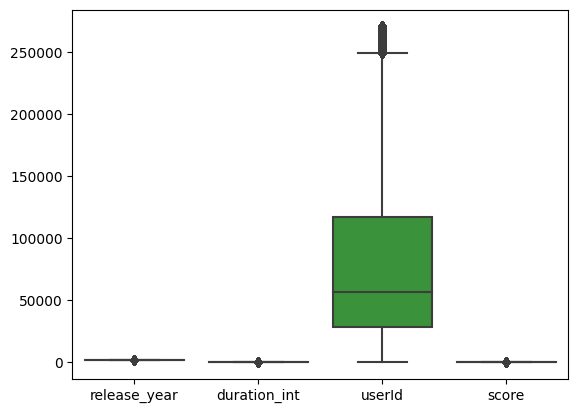

In [14]:
# identificación de valores atípicos
sns.boxplot(data=todo_df)
plt.show()
#este grafico se ve poco claro ya que el campo userid es el que predomina

<Axes: xlabel='duration_int'>

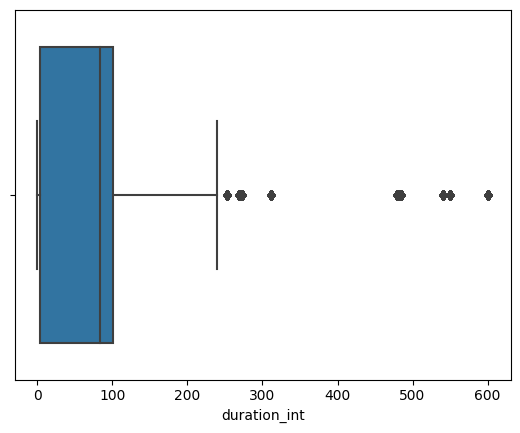

In [15]:
#Grafico un diagrama de cajas para identificar si la columna duration_int tiene valores atipicos
sns.boxplot(x="duration_int", data=todo_df)
#los datos atipicos que se muestran en el grafico, no estan mal ya que es correcto que algunas peliculas durab hasta 10hs

<Axes: xlabel='release_year'>

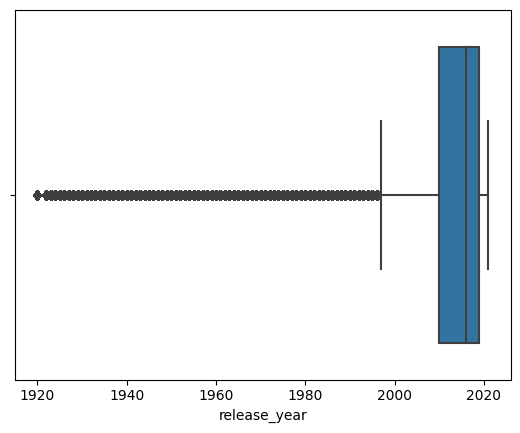

In [16]:
#Grafico un diagrama de cajas para identificar si la columna release_year tiene valores atipicos
sns.boxplot(x="release_year", data=todo_df)
#el grafico muestra que hay valores atripicos pero estas tambien esta correctamente ya que estas peliculas fueron lanzadas en ese año